# Dimension Reduction Using SKLearn
Michael Chambers - 190513

Quick run-through on generating PCA plots from a Mash distance matrix of some RefSeq K. pneumoniae genomes.

In [1]:
# import packages for the following code
import pandas as pd # used for data-wrangling
from sklearn.decomposition import PCA # pca dimension reduction
from sklearn.manifold import TSNE # tsne dimension reduction
import seaborn as sns # make plots

# show plots in Jupyter Notebook
%matplotlib inline 

In [2]:
# import Mash distance matrix and view head
df = pd.read_csv('refseq_kpne.tsv', sep='\t')
df.head()

,#query,GCF_000009885.1,GCF_000016305.1,GCF_000163455.1,GCF_000219945.1,GCF_000219965.1,GCF_000220485.1,GCF_000223435.1,GCF_000240185.1,GCF_000255975.2,...,GCF_000693015.1,GCF_000693035.1,GCF_000693055.1,GCF_000693075.1,GCF_000693095.1,GCF_000693115.1,GCF_000693135.1,GCF_000693155.1,GCF_000693175.1,GCF_000693195.1
0,GCF_000009885.1,0.000000,0.010697,0.013502,0.010914,0.011132,0.009650,0.012030,0.011264,0.012353,...,0.011802,0.011176,0.012307,0.008384,0.012777,0.010784,0.011938,0.011802,0.011847,0.011802
1,GCF_000016305.1,0.010697,0.000000,0.013404,0.009528,0.010272,0.010441,0.009896,0.011088,0.011309,...,0.009086,0.009406,0.010741,0.009979,0.011309,0.009814,0.010314,0.010146,0.010188,0.010146
2,GCF_000163455.1,0.013502,0.013404,0.000000,0.013306,0.014100,0.013699,0.014508,0.014715,0.015081,...,0.014715,0.013650,0.015294,0.012493,0.015888,0.013999,0.014923,0.014819,0.014871,0.014819
3,GCF_000219945.1,0.010914,0.009528,0.013306,0.000000,0.010741,0.010483,0.010441,0.010356,0.012168,...,0.010146,0.009447,0.011397,0.009406,0.011847,0.009166,0.010957,0.010870,0.010914,0.010827
4,GCF_000219965.1,0.011132,0.010272,0.014100,0.010741,0.000000,0.011397,0.010957,0.010741,0.011756,...,0.011264,0.011088,0.010914,0.010741,0.013404,0.011132,0.012353,0.012076,0.012122,0.012030


In [3]:
# check size of 
df.shape

(250, 251)

In [4]:
# prepare data for sklearn
# note: the "#query" column is being sliced out
cols = df.columns[1:]
data = df.values[:,1:] 

In [5]:
# use sklearn PCA to reduce dimensions
pca = PCA(2)
projected = pca.fit_transform(data)
projected = pd.DataFrame(projected, columns=['axis_1','axis_2'])

In [6]:
# view pca_df head
projected.head()

,axis_1,axis_2
0,0.065027,-0.019875
1,0.039832,-0.022127
2,0.108077,-0.001817
3,0.048508,-0.023007
4,0.062080,-0.018540


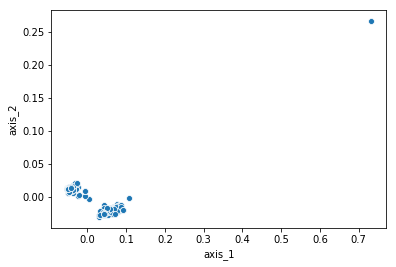

In [7]:
# plot the projected data
sns.scatterplot(x='axis_1', y='axis_2', data=projected,)

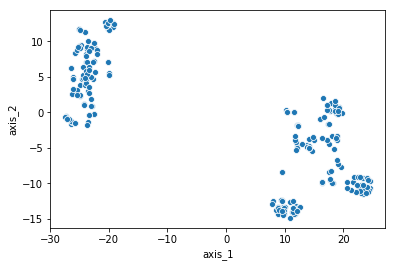

In [8]:
# repeat using TSNE dimension reduction
tsne = TSNE(2)
projected = tsne.fit_transform(data)
projected = pd.DataFrame(projected, columns=['axis_1','axis_2'])

# plot TSNE
sns.scatterplot(x='axis_1', y='axis_2', data=projected,)